<a href="https://colab.research.google.com/github/gaurisharma360/intensityofepilepsy/blob/main/Intensity_of_Epilepsy_using_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np

In [12]:
data_df=pd.read_csv("/content/Minorv2.csv")

In [13]:
data_df.head()

,"Treatment (0=Placebo, 1=Progabide)",Age,Difference in frequencies,Intensity of disease
0,0,31,0.375,4
1,0,30,0.375,4
2,0,25,0.625,4
3,0,36,0.625,4
4,0,22,-1.375,2


In [14]:

x=data_df.drop([('Intensity of disease')],axis=1).values
y=data_df['Intensity of disease'].values

In [15]:
print(x)

[[ 0.    31.     0.375]
 [ 0.    30.     0.375]
 [ 0.    25.     0.625]
 [ 0.    36.     0.625]
 [ 0.    22.    -1.375]
 [ 0.    29.    -0.625]
 [ 0.    31.     0.   ]
 [ 0.    36.     5.375]
 [ 0.    37.    -0.125]
 [ 0.    28.     2.875]
 [ 0.    36.     1.75 ]
 [ 0.    24.    -0.25 ]
 [ 0.    28.    -0.25 ]
 [ 0.    36.     0.   ]
 [ 0.    26.    -3.5  ]
 [ 0.    26.    -4.25 ]
 [ 0.    28.    -1.5  ]
 [ 0.    31.     1.5  ]
 [ 0.    32.    -0.375]
 [ 0.    21.    -0.5  ]
 [ 0.    29.     0.25 ]
 [ 0.    21.     0.625]
 [ 0.    32.    -0.5  ]
 [ 0.    25.     0.25 ]
 [ 0.    30.    11.   ]
 [ 0.    40.    -0.375]
 [ 0.    19.     0.   ]
 [ 0.    22.     0.75 ]
 [ 1.    18.    -4.25 ]
 [ 1.    32.    -1.25 ]
 [ 1.    20.    -1.5  ]
 [ 1.    20.     0.375]
 [ 1.    18.     0.   ]
 [ 1.    24.    -1.625]
 [ 1.    30.     5.375]
 [ 1.    35.     0.75 ]
 [ 1.    57.    -0.125]
 [ 1.    20.    -5.375]
 [ 1.    22.    -1.5  ]
 [ 1.    28.    -0.375]
 [ 1.    23.    -2.   ]
 [ 1.    40.    

In [16]:
print(y)

[4 4 4 4 2 3 4 6 3 5 5 3 3 4 1 1 2 5 3 3 4 4 3 4 7 3 4 4 6 2 2 4 4 2 6 3 3
 1 2 3 2 3 5 2 4 4 3 3 7 2 2 2 4 2 3 6 2 2 3]


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred=ml.predict(x_test)
print(y_pred)

[3.61986518 3.31751628 4.76316622 3.52124139 3.1899499  2.78518894
 2.69805273 3.42005115 2.85558187]


In [20]:
ml.predict([[0,31,0.375]])

array([3.61986518])

In [21]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred, squared=False)
errors

0.6634561589850955

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6758718175771294

Text(0.5, 1.0, 'Actual vs Predicted')

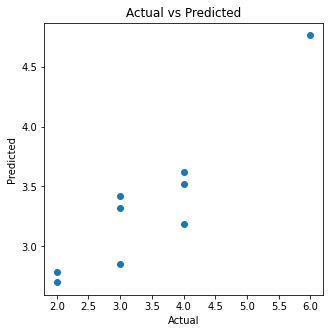

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

**Multinomial Logistic Regression**

In [25]:
x_train

array([[ 0.   , 28.   , -0.25 ],
       [ 1.   , 32.   , -1.125],
       [ 0.   , 36.   ,  0.625],
       [ 1.   , 57.   , -0.125],
       [ 1.   , 20.   ,  0.375],
       [ 0.   , 37.   , -0.125],
       [ 0.   , 31.   ,  1.5  ],
       [ 0.   , 31.   ,  0.   ],
       [ 0.   , 22.   , -1.375],
       [ 1.   , 32.   , -0.125],
       [ 0.   , 21.   , -0.5  ],
       [ 1.   , 20.   , -1.5  ],
       [ 1.   , 25.   , -2.   ],
       [ 1.   , 35.   ,  0.125],
       [ 1.   , 26.   ,  3.625],
       [ 0.   , 26.   , -4.25 ],
       [ 0.   , 28.   ,  2.875],
       [ 0.   , 22.   ,  0.75 ],
       [ 0.   , 19.   ,  0.   ],
       [ 0.   , 28.   , -1.5  ],
       [ 0.   , 30.   , 11.   ],
       [ 1.   , 24.   , -1.625],
       [ 1.   , 21.   , -2.375],
       [ 1.   , 40.   , -0.125],
       [ 0.   , 24.   , -0.25 ],
       [ 1.   , 18.   ,  0.   ],
       [ 1.   , 21.   ,  1.75 ],
       [ 1.   , 23.   , -2.   ],
       [ 1.   , 20.   , -5.375],
       [ 1.   , 32.   , -1.25 ],
       [ 1

In [26]:
y_train

array([3, 2, 4, 3, 4, 3, 5, 4, 2, 3, 3, 2, 2, 4, 6, 1, 5, 4, 4, 2, 7, 2,
       2, 3, 3, 4, 4, 2, 1, 2, 2, 4, 4, 4, 3, 3, 3, 4, 7, 5, 3, 3, 3, 4,
       6, 5, 1, 6, 2, 2])

In [27]:
x_test

array([[ 0.   , 31.   ,  0.375],
       [ 0.   , 29.   , -0.625],
       [ 1.   , 30.   ,  5.375],
       [ 0.   , 36.   ,  0.   ],
       [ 1.   , 25.   ,  0.125],
       [ 1.   , 41.   , -1.375],
       [ 1.   , 36.   , -1.625],
       [ 0.   , 40.   , -0.375],
       [ 1.   , 25.   , -1.   ]])

In [28]:
y_test

array([4, 3, 6, 4, 4, 2, 2, 3, 3])

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [120]:
lr=LogisticRegression(multi_class="multinomial",solver="lbfgs",random_state=42)

In [121]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial', random_state=42)

In [122]:
y_predlr=lr.predict(x_test)

In [123]:
lr.score(x_test,y_test)

0.5555555555555556

In [113]:
#applying standardisation
#scaler=StandardScaler()

In [114]:
#x_train_s=scaler.fit_transform(x_train)
#x_test_s=scaler.transform(x_test)

In [115]:
#lr.fit(x_train,y_train)

LogisticRegression(max_iter=1500, multi_class='multinomial', random_state=42)

In [116]:
#y_predlr2=lr.predict(x_test_s)

In [118]:
#lr.score(x_test_s,y_test)

0.3333333333333333